In [1]:
# ############ Created to convert validation.txt .wav to .jpg
# #!/usr/bin/env python
# import os, sys

# stext = '.wav'
# rtext = '.jpg'
# input = open('./data/train/validation_list.txt')
# output = open('./data/picts/train/validation_list.txt', 'w')
# for s in input.readlines(  ):
#     output.write(s.replace(stext, rtext))
# output.close(  )
# input.close(  )

In [2]:
#commands for tpu
# virtualenv -p `which python2.7` tpu_python27
# source tpu_python27/bin/activate

# https://github.com/tensorflow/tpu/blob/master/tools/datasets/jpeg_to_tf_record.py
# :~/environments/$ git clone https://github.com/tensorflow/tpu.git

#####Train/eval
# python jpeg_to_tf_record.py --train_csv ~/machine_learning/speech/trainTfRecords.csv --validation_csv \
# ~/machine_learning/speech/valTfRecords.csv \
# --labels_file ./labels_nums.txt --project_id versatile-skein-206919 --output_dir ~/machine_learning/speech/tfRecords

####Test
# python jpeg_to_tf_record.py --train_csv ~/machine_learning/speech/testTfRecords.csv \
# --validation_csv ~/machine_learning/speech/valTfRecords.csv --labels_file ./testLabels.txt \
# --project_id versatile-skein-206919 --output_dir ~/machine_learning/speech/testTfRecords

# export BUCKET=newtpu
# python mobilenet.py --alsologtostderr --master=$TPU
# _WORKER --data_dir=gs://$BUCKET/tfRecords --model_dir=gs://$BUCKET/models/mobilenet/v0 --num_shards=8 --bat
# ch_size=1024 --use_tpu=0


# jupyter-notebook --no-browser --port=5000
# tensorboard --logdir <PATH>

In [3]:
from __future__ import print_function

import glob
import math
import os

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.python.data import Dataset
%matplotlib inline

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

/home/harrisonfsmith95/anaconda3/lib/python3.5/site-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)


In [4]:
# Create tf.records (pwd = ~/environments)
# python ./tpu/tools/datasets/jpeg_to_tf_record.py --train_csv ~/machine_learning/speech/trainTfRecords.csv
# --validation_csv ~/machine_learning/speech/valTfRecords.csv --labels_file ~/environments/labels.txt 
# --project_id versatile-skein-206919 --output_dir ~/environments/tfRecords/

In [5]:
# jpeg_data_tensor, decoded_image_tensor = add_jpeg_decoding(module_spec)

In [6]:
DATADIR = '/home/harrisonfsmith95/machine_learning/speech/data' # unzipped train and test data
OUTDIR = './model-k' # just a random name
# Data Loading
import os
import re
from glob import glob

# POSSIBLE_LABELS = 'tree five dog happy go right silence marvin no eight one bed bird nine\
#             wow two on stop house left seven three sheila zero cat four off yes down up six'.split()
# POSSIBLE_LABELS_NO_U = 'yes no up down left right on off stop go silence tree five dog happy\
#               marvin eight one bed bird nine wow two house seven three sheila zero cat four six'.split()
POSSIBLE_LABELS_U = 'yes no up down left right on off stop go silence unknown'.split()
POSSIBLE_LABELS = 'yes no up down left right on off stop go silence'.split()
# POSSIBLE_LABELS = 'no yes'.split()
id2name = {i: name for i, name in enumerate(POSSIBLE_LABELS_U)}
name2id = {name: i for i, name in id2name.items()}

'''
load data
change text file to .jpg
change path to data/picts/train/*/*jpg
'''


def load_data(data_dir):
    """ Return 2 lists of tuples:
    [(class_id, user_id, path), ...] for train
    [(class_id, user_id, path), ...] for validation
    """
    # Just a simple regexp for paths with three groups:
    # prefix, label, user_id
    pattern = re.compile("(.+\/)?(\w+)\/([^_]+)_.+jpg")
    all_files = glob(os.path.join(data_dir, 'picts/train_96_imsave/*/*jpg'))

    with open(os.path.join(data_dir, 'picts/train_96_imsave/validation_list.txt'), 'r') as fin:
        validation_files = fin.readlines()
    valset = set()
    for entry in validation_files:
        r = re.match(pattern, entry)
        if r:
            valset.add(r.group(3))

    possible = set(POSSIBLE_LABELS)
    train, val = [], []
    u = 0
    for entry in all_files:
        r = re.match(pattern, entry)
        if r:
            label_id = None
            label, uid = r.group(2), r.group(3)
            if label == '_background_noise_':
                label = 'silence'
#             if label not in possible:
#                 if u % 20 == 0:
#                     label_id = name2id['unknown']
#                 u += 1
#             else:                              ##only when not working with unknown
            if label in possible:
                label_id = name2id[label]
            
            if label_id != None:
                sample = (label_id, uid, entry)
                if uid in valset:
                    val.append(sample)
                else:
                    train.append(sample)

    print('There are {} train and {} val samples'.format(len(train), len(val)))
    return train, val

first_trainset, first_valset = load_data(DATADIR)

There are 21507 train and 2577 val samples


In [7]:
###### Check this 'eb9c403fc'

In [8]:
valset = first_valset##[]
trainset = first_trainset#[]

In [9]:
# POSSIBLE_LABELS = 'yes no'.split()
# id2name = {i: name for i, name in enumerate(POSSIBLE_LABELS)}
# name2id = {name: i for i, name in id2name.items()}

In [10]:
for idx2, i2 in enumerate(valset):
    print(idx2, i2)#[0])

0 (9, 'e6db3894', '/home/harrisonfsmith95/machine_learning/speech/data/picts/train_96_imsave/go/e6db3894_nohash_0.jpg')
1 (9, '29b81b73', '/home/harrisonfsmith95/machine_learning/speech/data/picts/train_96_imsave/go/29b81b73_nohash_0.jpg')
2 (9, 'bdee441c', '/home/harrisonfsmith95/machine_learning/speech/data/picts/train_96_imsave/go/bdee441c_nohash_0.jpg')
3 (9, '6071a214', '/home/harrisonfsmith95/machine_learning/speech/data/picts/train_96_imsave/go/6071a214_nohash_1.jpg')
4 (9, 'dbb40d24', '/home/harrisonfsmith95/machine_learning/speech/data/picts/train_96_imsave/go/dbb40d24_nohash_5.jpg')
5 (9, '56eb74ae', '/home/harrisonfsmith95/machine_learning/speech/data/picts/train_96_imsave/go/56eb74ae_nohash_2.jpg')
6 (9, '86478fab', '/home/harrisonfsmith95/machine_learning/speech/data/picts/train_96_imsave/go/86478fab_nohash_0.jpg')
7 (9, 'bdee441c', '/home/harrisonfsmith95/machine_learning/speech/data/picts/train_96_imsave/go/bdee441c_nohash_1.jpg')
8 (9, 'dbb40d24', '/home/harrisonfsmith9

In [11]:
for idx, i in enumerate(trainset):
    print(idx, i[0])

0 9
1 9
2 9
3 9
4 9
5 9
6 9
7 9
8 9
9 9
10 9
11 9
12 9
13 9
14 9
15 9
16 9
17 9
18 9
19 9
20 9
21 9
22 9
23 9
24 9
25 9
26 9
27 9
28 9
29 9
30 9
31 9
32 9
33 9
34 9
35 9
36 9
37 9
38 9
39 9
40 9
41 9
42 9
43 9
44 9
45 9
46 9
47 9
48 9
49 9
50 9
51 9
52 9
53 9
54 9
55 9
56 9
57 9
58 9
59 9
60 9
61 9
62 9
63 9
64 9
65 9
66 9
67 9
68 9
69 9
70 9
71 9
72 9
73 9
74 9
75 9
76 9
77 9
78 9
79 9
80 9
81 9
82 9
83 9
84 9
85 9
86 9
87 9
88 9
89 9
90 9
91 9
92 9
93 9
94 9
95 9
96 9
97 9
98 9
99 9
100 9
101 9
102 9
103 9
104 9
105 9
106 9
107 9
108 9
109 9
110 9
111 9
112 9
113 9
114 9
115 9
116 9
117 9
118 9
119 9
120 9
121 9
122 9
123 9
124 9
125 9
126 9
127 9
128 9
129 9
130 9
131 9
132 9
133 9
134 9
135 9
136 9
137 9
138 9
139 9
140 9
141 9
142 9
143 9
144 9
145 9
146 9
147 9
148 9
149 9
150 9
151 9
152 9
153 9
154 9
155 9
156 9
157 9
158 9
159 9
160 9
161 9
162 9
163 9
164 9
165 9
166 9
167 9
168 9
169 9
170 9
171 9
172 9
173 9
174 9
175 9
176 9
177 9
178 9
179 9
180 9
181 9
182 9
183 9
184 9


In [12]:
import random
# print(valset[4001], POSSIBLE_LABELS[valset[4001][0]])
print(type(valset))
# print(trainset[0])
random.shuffle(trainset)
random.shuffle(valset)
print(valset)

<class 'list'>
[(7, '2296b1af', '/home/harrisonfsmith95/machine_learning/speech/data/picts/train_96_imsave/off/2296b1af_nohash_1.jpg'), (5, 'e54a0f16', '/home/harrisonfsmith95/machine_learning/speech/data/picts/train_96_imsave/right/e54a0f16_nohash_1.jpg'), (4, '7fd25f7c', '/home/harrisonfsmith95/machine_learning/speech/data/picts/train_96_imsave/left/7fd25f7c_nohash_3.jpg'), (9, '1942abd7', '/home/harrisonfsmith95/machine_learning/speech/data/picts/train_96_imsave/go/1942abd7_nohash_0.jpg'), (4, '7c1d8533', '/home/harrisonfsmith95/machine_learning/speech/data/picts/train_96_imsave/left/7c1d8533_nohash_1.jpg'), (1, '53d5b86f', '/home/harrisonfsmith95/machine_learning/speech/data/picts/train_96_imsave/no/53d5b86f_nohash_0.jpg'), (4, 'd9ae8983', '/home/harrisonfsmith95/machine_learning/speech/data/picts/train_96_imsave/left/d9ae8983_nohash_0.jpg'), (9, 'ccea893d', '/home/harrisonfsmith95/machine_learning/speech/data/picts/train_96_imsave/go/ccea893d_nohash_0.jpg'), (4, '060cd039', '/home

In [13]:
# # # Create CSV for tpu tf.records
# trainTfRecords = pd.DataFrame(trainset, columns=['label','name', 'URL-of-image'])
# trainTfRecords.drop(['name'], axis=1, inplace=True)
# trainTfRecords = trainTfRecords[trainTfRecords.columns[::-1]]
# print(trainTfRecords)
# # trainTfRecords.to_csv('trainTfRecords.csv', index=False)
# trainTfRecords.to_csv('testing_something.csv', index=False)

In [14]:
# # Create CSV for tpu tf.records
# valTfRecords = pd.DataFrame(valset, columns=['label','name', 'URL-of-image'])
# valTfRecords.drop(['name'], axis=1, inplace=True)
# valTfRecords = valTfRecords[valTfRecords.columns[::-1]]
# print(valTfRecords)
# valTfRecords.to_csv('valTfRecords.csv', index=False)

In [15]:
# from PIL import Image
# from numpy import array


#     img = Image.open(path)
#     img = img.resize((96, 96), Image.ANTIALIAS)
#     img = img.rotate(90) ## Possibly take this out
#     arr = array(img)
#     return arr

# def create_labels_and_examples(data):
#     # train = np.zeros(shape=(0, 96, 96, 3))
#     features = []
#     labels = []
#     for i in data:
#     #     arr = np.append(arr, [img_to_arr(i[2])], axis=0)
#         #append features
#         feature = img_to_arr(i[2])
#         features.append(feature)
        
#         # Append labels
#         label = i[0]
#         labels.append(label)
#         return np.array(features), np.array(labels)

In [16]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

train_audio_path = "./data/picts/train_96_imsave/"
# dirs = [f for f in os.listdir(train_audio_path) if isdir(join(train_audio_path, f)) and (f in POSSIBLE_LABELS_U)]
dirs = POSSIBLE_LABELS#_U
dirs.sort()
print('Number of labels: ' + str(len(dirs)))

Number of labels: 11


In [17]:
# Calculate
number_of_recordings = []
# for direct in dirs:
#     waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.jpg')]
#     number_of_recordings.append(len(waves))

for direct in dirs:
    waves = [f for f in trainset if f[0] == name2id[direct]]
    number_of_recordings.append(len(waves))

# Plot
data = [go.Histogram(x=dirs, y=number_of_recordings)]
trace = go.Bar(
    x=dirs,
    y=number_of_recordings,
    marker=dict(color = number_of_recordings, colorscale='Viridius', showscale=True
    ),
)
layout = go.Layout(
    title='Number of recordings in given label',
    xaxis = dict(title='Words'),
    yaxis = dict(title='Number of recordings')
)
py.iplot(go.Figure(data=[trace], layout=layout))

In [38]:
from PIL import Image
from numpy import array


# train = np.zeros(shape=(0, 96, 96, 3))
def img_to_arr(path):
    img = Image.open(path)
    img = img.resize((28, 28), Image.ANTIALIAS)
#     img = img.rotate(90) ## Possibly take this out
    arr = array(img)
    return arr

In [39]:
########## Smaller train and val set

# def split_valid_to_training(valset):
#     n_trainset = []
#     n_valset = []
#     for idx, val in enumerate(valset):
#         if (idx % 10 == 0):
#             n_valset.append(val)
#         else:
#             n_trainset.append(val)
#     return n_valset, n_trainset

# n_valset, n_trainset = split_valid_to_training(valset)

In [40]:
# print(len(n_valset), len(n_trainset))

In [43]:
######## If data changed

training_examples = []
training_targets = []
for i in trainset:
# for i in n_trainset: # 1/100th of the data
    #append features
    new1 = img_to_arr(i[2])
    training_examples.append(new1)
    
    # Append labels
    label1 = int(i[0])
    training_targets.append(label1)
    
training_examples = np.array(training_examples)#.reshape(-1,96,96,3)
training_targets = np.array(training_targets)

######## Else (REDO THESE) POSSIBLY MISSING LABEL 2 (ending in 2 is correct)
# training_examples = np.load('./data/numpy_array_training_examples1.npy')## not float32 and not divided by 255
# training_examples = np.load('./data/numpy_array_training_examples_float_not_divided1.npy')## is float32 and not divided by 255

# training_examples = np.load('./data/numpy_array_training_examples_float_255_divided2.npy')## float32 and divided by 255
# training_targets = np.load('./data/numpy_array_training_targets2.npy')

In [44]:
######## If data changed

validation_examples = []
validation_targets = []
for i in valset:
# for i in n_valset: # 1/100th of the data
    #append features
    new = img_to_arr(i[2])
    validation_examples.append(new)
    
    # Append labels
    label = int(i[0])
    validation_targets.append(label)
    
validation_examples = np.array(validation_examples)#.reshape(-1,96,96,3)
validation_targets = np.array(validation_targets)

######### Else (REDO THESE) POSSIBLY MISSING LABEL 2 (ending in 2 is correct)
# validation_examples = np.load('./data/numpy_array_validation_examples_examples_float_255_divided2.npy') ## float32 and divided by 255
# validation_targets = np.load('./data/numpy_array_validation_targets2.npy')

In [45]:
# validation_examples = create_labels_and_examples(valset)
print(validation_examples.shape, validation_targets.shape)
print(training_examples.shape, training_targets.shape)

(2577, 28, 28, 3) (2577,)
(21507, 28, 28, 3) (21507,)


In [46]:
print(training_targets)

[9 1 5 ... 4 8 8]


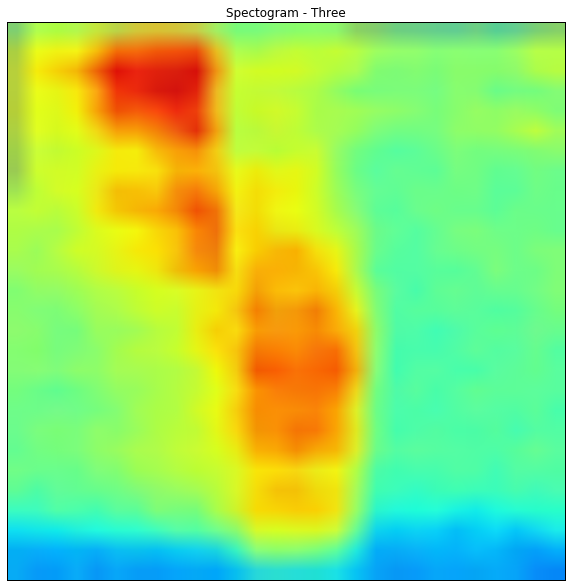

In [47]:
fig = plt.figure(figsize = (10,10))
ax1 = fig.add_subplot(111)
ax1.set_xticks([])
ax1.set_yticks([])

ax1.set_title('Spectogram - Three')
ax1.imshow(training_examples[6])#, aspect='auto', origin='lower')

In [48]:
# np.save('./data/numpy_array_training_examples1', training_examples)
# np.save('./data/numpy_array_training_targets1', training_targets)
# np.save('./data/numpy_array_validation_examples1', validation_examples)
# np.save('./data/numpy_array_validation_targets1', validation_targets)

In [49]:
# # Maybe convert for speed
validation_examples = (validation_examples / 255).astype('float32')
# # validation_examples = (validation_examples).astype('float32')

In [50]:
####### Operation completed

# for idx, t in enumerate(training_examples):
#     training_examples[idx] = t / 255
# # training_examples = training_examples.astype('float32')

# ## For some reason I get a memory error when I try this code below, so I just iterate above instead

# np.save('./data/numpy_array_training_examples1', training_examples)
training_examples = (training_examples / 255).astype('float32')
# training_examples = (training_examples).astype('float32')

In [51]:
# # Saving np arrays into files
# np.save('./data/numpy_array_training_examples_examples_float_255_divided2', training_examples)
# np.save('./data/numpy_array_training_targets2', training_targets)
# np.save('./data/numpy_array_validation_examples_examples_float_255_divided2', validation_examples)
# np.save('./data/numpy_array_validation_targets2', validation_targets)

In [52]:
# print (validation_examples[0])
print (training_examples[0])


[[[0.4627451  0.79607844 0.4745098 ]
  [0.44313726 0.99215686 0.53333336]
  [0.4392157  0.972549   0.52156866]
  ...
  [0.48235294 0.79607844 0.49019608]
  [0.4392157  0.8039216  0.49411765]
  [0.47843137 0.79607844 0.48235294]]

 [[0.5803922  0.8156863  0.3647059 ]
  [0.7254902  1.         0.29803923]
  [0.70980394 0.9882353  0.25882354]
  ...
  [0.6313726  1.         0.3764706 ]
  [0.60784316 1.         0.39215687]
  [0.69411767 1.         0.3019608 ]]

 [[0.4392157  0.81960785 0.47058824]
  [0.5686275  1.         0.41960785]
  [0.5647059  0.98039216 0.38431373]
  ...
  [0.5568628  0.9843137  0.41960785]
  [0.49019608 0.9843137  0.47058824]
  [0.5294118  0.99215686 0.41568628]]

 ...

 [[0.05098039 0.8784314  0.9490196 ]
  [0.03137255 0.85490197 0.95686275]
  [0.04705882 0.8784314  0.95686275]
  ...
  [0.06666667 0.8901961  0.9254902 ]
  [0.04705882 0.8980392  0.9529412 ]
  [0.06666667 0.89411765 0.92156863]]

 [[0.01568628 0.7019608  0.972549  ]
  [0.01176471 0.69803923 0.9764706 ]


In [53]:
def create_training_input_fn(features, labels, batch_size):#, num_epochs=None, shuffle=True):

  train_input_fn = tf.estimator.inputs.numpy_input_fn(
      x=features,
      y=labels,
      batch_size=batch_size,
      num_epochs=None,
      shuffle=True)

  return train_input_fn

In [54]:
def create_predict_input_fn(features, labels, batch_size):

  predict_input_fn = tf.estimator.inputs.numpy_input_fn(
      x=features,
      y=labels,
      num_epochs=1,
      shuffle=False)

  return predict_input_fn

In [111]:
def model_fn(features, labels, mode, params):
  """Model function for CNN."""
  # Input Layer
  # Reshape X to 4-D tensor: [batch_size, width, height, channels]
  # MNIST images are 28x28 pixels, and have one color channel
  input_layer = tf.reshape(features, [-1, 28, 28, 3])#old [-1,28,28,1]

  # Convolutional Layer #1
  # Computes 32 features using a 5x5 filter with ReLU activation.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 28, 28, 1]
  # Output Tensor Shape: [batch_size, 28, 28, 32]
  conv1 = tf.layers.conv2d(
      inputs=input_layer,
      filters=32,#16
      kernel_size=[3, 3],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #1
  # First max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 28, 28, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 32]
  pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
#   print("POOL1: ", pool1)

  # Convolutional Layer #2
  # Computes 64 features using a 5x5 filter.
  # Padding is added to preserve width and height.
  # Input Tensor Shape: [batch_size, 14, 14, 32]
  # Output Tensor Shape: [batch_size, 14, 14, 64]
  conv2 = tf.layers.conv2d(
      inputs=pool1,
      filters=64,
      kernel_size=[5, 5],
      padding="same",
      activation=tf.nn.relu)

  # Pooling Layer #2
  # Second max pooling layer with a 2x2 filter and stride of 2
  # Input Tensor Shape: [batch_size, 14, 14, 64]
  # Output Tensor Shape: [batch_size, 7, 7, 64]
  pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
#   print("POOL2: ", pool2)

  # Flatten tensor into a batch of vectors
  # Input Tensor Shape: [batch_size, 7, 7, 64]
  # Output Tensor Shape: [batch_size, 7 * 7 * 64]
  pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])#pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
#   print("POOL2_FLAT: ", pool2_flat)

  # Dense Layer
  # Densely connected layer with 1024 neurons
  # Input Tensor Shape: [batch_size, 7 * 7 * 64]
  # Output Tensor Shape: [batch_size, 1024]
  dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
#   print("DENSE: ", dense)

  # Add dropout operation; 0.6 probability that element will be kept
  dropout = tf.layers.dropout(
      inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

  # Logits layer
  # Input Tensor Shape: [batch_size, 1024]
  # Output Tensor Shape: [batch_size, 10]
  logits = tf.layers.dense(inputs=dropout, units=len(POSSIBLE_LABELS))#########

  predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
  }
  if mode == tf.estimator.ModeKeys.PREDICT:
    return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

  # Calculate Loss (for both TRAIN and EVAL modes)
  loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

  # Configure the Training Op (for TRAIN mode)
  if mode == tf.estimator.ModeKeys.TRAIN:

    optimizer = params["optimizer"]
    train_op = optimizer.minimize(
        loss=loss,
        global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

  # Add evaluation metrics (for EVAL mode)
  eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
  return tf.estimator.EstimatorSpec(
      mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [112]:
# def model_fn(features, labels, mode, params):
#     # Load mobilenet model.
#     module = hub.Module("https://tfhub.dev/google/imagenet/mobilenet_v2_035_96/feature_vector/1")#imagenet/inception_v3/feature_vector/1")
# #     module = params["module"]
# #     input_layer = adjust_image(features["x"])
# #     outputs = module(input_layer)
#     input_layer = features
#     outputs = module(input_layer)

#     logits = tf.layers.dense(inputs=outputs, units=len(POSSIBLE_LABELS_U))#-1)#12) ### was 10 ####-1 because of unknown

#     predictions = {
#         # Generate predictions (for PREDICT and EVAL mode)
#         "classes": tf.argmax(input=logits, axis=1),
#         # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
#         # `logging_hook`.
#         "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
#     }

#     if mode == tf.estimator.ModeKeys.PREDICT:
#         return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

#     # Calculate Loss (for both TRAIN and EVAL modes)
#     loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

#     # Configure the Training Op (for TRAIN mode)
#     if mode == tf.estimator.ModeKeys.TRAIN:
#         optimizer = tf.train.GradientDescentOptimizer(learning_rate=params["learning_rate"])#0.001)
#         optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, 5.0)###added
#         train_op = optimizer.minimize(
#             loss=loss,
#             global_step=tf.train.get_global_step())
#         return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

#     # Add evaluation metrics (for EVAL mode)
#     eval_metric_ops = {
#         "accuracy": tf.metrics.accuracy(
#             labels=labels, predictions=predictions["classes"])}
#     return tf.estimator.EstimatorSpec(
#         mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [120]:
def train_classification_model(
    learning_rate,
    steps,
    batch_size,
    hidden_units,
    model_directory,
    periods,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
  """Trains a neural network classification model for the MNIST digits dataset.
  
  In addition to training, this function also prints training progress information,
  a plot of the training and validation loss over time, as well as a confusion
  matrix.
  
  Args:
    learning_rate: An `int`, the learning rate to use.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    hidden_units: A `list` of int values, specifying the number of neurons in each layer.
    training_examples: A `DataFrame` containing the training features.
    training_targets: A `DataFrame` containing the training labels.
    validation_examples: A `DataFrame` containing the validation features.
    validation_targets: A `DataFrame` containing the validation labels.
      
  Returns:
    The trained `Classifier` object.
  """

  ## Data logging in terminal
  tf.logging.set_verbosity(tf.logging.INFO)
        # Set up logging for predictions
  tensors_to_log = {"probabilities": "softmax_tensor"}
  logging_hook = tf.train.LoggingTensorHook(
            tensors=tensors_to_log, every_n_iter=100) #changed from 10   

  # Caution: input pipelines are reset with each call to train. 
  # If the number of steps is small, your model may never see most of the data.  
  # So with multiple `.train` calls like this you may want to control the length 
  # of training with num_epochs passed to the input_fn. Or, you can do a really-big shuffle, 
  # or since it's in-memory data, shuffle all the data in the `input_fn`.
  steps_per_period = steps // periods  
  
  # Create the input functions.
  predict_training_input_fn = create_predict_input_fn(
    training_examples, training_targets, batch_size)
  predict_validation_input_fn = create_predict_input_fn(
    validation_examples, validation_targets, batch_size)
  training_input_fn = create_training_input_fn(
    training_examples, training_targets, batch_size)

  # Create feature columns.
#   feature_columns = [tf.feature_column.numeric_column('pixels', shape=784)]

#   my_optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
#   my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)

#   my_optimizer = tf.train.AdagradOptimizer(learning_rate=0.05)
#   my_optimizer = tf.train.AdamOptimizer(learning_rate=0.0005)
#   my_optimizer = tf.train.RMSPropOptimizer(learning_rate=0.001)

  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    
    
  # Create the Estimator                        ## ADDED params so that I can pass values to model
  classifier = tf.estimator.Estimator(
    model_fn=model_fn, model_dir=model_directory, params={
        'learning_rate': learning_rate,
        'optimizer' : my_optimizer,
#         'module' : module
#         'feature_columns': my_feature_columns,
#         # Two hidden layers of 10 nodes each.
#         'hidden_units': [10, 10],
#         # The model must choose between 3 classes.
#         'n_classes': 3,
    })

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print("Training model...")
  print("LogLoss error and accuracy (on validation data):")
  training_errors = []
  validation_errors = []
  training_accuracy = []
  validation_accuracy = []
  for period in range (0, periods):
  # Train the model, starting from the prior state.

      # Train the model
    classifier.train(
              input_fn=training_input_fn,
              steps=steps_per_period,#,#000,#20000,
              hooks=[logging_hook]
            )
    print("period %02d :" % (period))
    train_results = classifier.evaluate(input_fn=predict_training_input_fn)
    print('  train:', train_results)
    eval_results = classifier.evaluate(input_fn=predict_validation_input_fn)
    print('  valid:', eval_results)
    
    # Compute training and validation errors.
    training_log_loss = train_results['loss']
    validation_log_loss = eval_results['loss']
    
    training_acc = train_results['accuracy']
    validation_acc = eval_results['accuracy']
    
    # Occasionally print the current loss.
#     print("period %02d : %0.2f     Accuracy: %02f" % (period, validation_log_loss, eval_results['accuracy']))
    # Add the loss metrics from this period to our list.
    training_errors.append(training_log_loss)
    validation_errors.append(validation_log_loss)
    
    training_accuracy.append(training_acc)
    validation_accuracy.append(validation_acc)
  print("Model training finished.")
  # Remove event files to save disk space.
#   _ = map(os.remove, glob.glob(os.path.join(classifier.model_dir, 'events.out.tfevents*')))
  
  # Calculate final predictions (not probabilities, as above).
  final_predictions = classifier.predict(input_fn=predict_validation_input_fn)
  final_predictions = np.array([item['classes'] for item in final_predictions])
  
  
  accuracy = metrics.accuracy_score(validation_targets, final_predictions)
  print("Final accuracy (on validation data): %0.2f" % accuracy)

  # Output a graph of loss metrics over periods.
  fig = plt.figure(figsize = (10,10))
  plt.ylabel("LogLoss")
  plt.xlabel("Periods")
  plt.title("LogLoss vs. Periods")
  plt.plot(training_errors, label="training")
  plt.plot(validation_errors, label="validation")
  plt.legend()
  plt.show()
    
  # Output a graph of loss metrics over periods.
  fig = plt.figure(figsize = (10,10))
  plt.ylabel("Accuracy")
  plt.xlabel("Periods")
  plt.title("Accuracy vs. Periods")
  plt.plot(training_accuracy, label="training")
  plt.plot(validation_accuracy, label="validation")
  plt.legend()
  plt.show()
  
  # Output a plot of the confusion matrix.
  cm = metrics.confusion_matrix(validation_targets, final_predictions)
  # Normalize the confusion matrix by row (i.e by the number of samples
  # in each class).
  cm_normalized = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  ax = sns.heatmap(cm_normalized, cmap="bone_r")
  ax.set_aspect(1)
  plt.title("Confusion matrix")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

  return classifier

In [121]:
# %%time
# tfhub_classifier = train_tfhub_classification_model(
#     learning_rate=.001,#0.001,#0.05,
#     steps=1000000,
# #     learning_rate=.000000000001,
# #     steps=1,
#     batch_size=64,
#     hidden_units=[5],
#     model_directory="./mobilenet_v6/sound_all_1000000_steps_jul_20_1",#Remember to change directory right after you run model
#     periods = 10,#5,#2# was 10,
#     training_examples=training_examples,
#     training_targets=training_targets,
#     validation_examples=validation_examples,
#     validation_targets=validation_targets
# )

Training model...
LogLoss error and accuracy (on validation data):
period 00 :
  train:  {'accuracy': 0.44548288, 'global_step': 1000, 'loss': 1.6179943}
  valid: {'accuracy': 0.4369422, 'global_step': 1000, 'loss': 1.6339447}
period 01 :
  train:  {'accuracy': 0.65657693, 'global_step': 2000, 'loss': 1.0400873}
  valid: {'accuracy': 0.6313543, 'global_step': 2000, 'loss': 1.0770991}
period 02 :
  train:  {'accuracy': 0.7338076, 'global_step': 3000, 'loss': 0.7945371}
  valid: {'accuracy': 0.7171129, 'global_step': 3000, 'loss': 0.8399896}
period 03 :
  train:  {'accuracy': 0.80750453, 'global_step': 4000, 'loss': 0.59768325}
  valid: {'accuracy': 0.7935584, 'global_step': 4000, 'loss': 0.65330094}
period 04 :
  train:  {'accuracy': 0.84535265, 'global_step': 5000, 'loss': 0.48344064}
  valid: {'accuracy': 0.8133488, 'global_step': 5000, 'loss': 0.56776136}
period 05 :
  train:  {'accuracy': 0.8647417, 'global_step': 6000, 'loss': 0.4142126}
  valid: {'accuracy': 0.8288708, 'global_ste

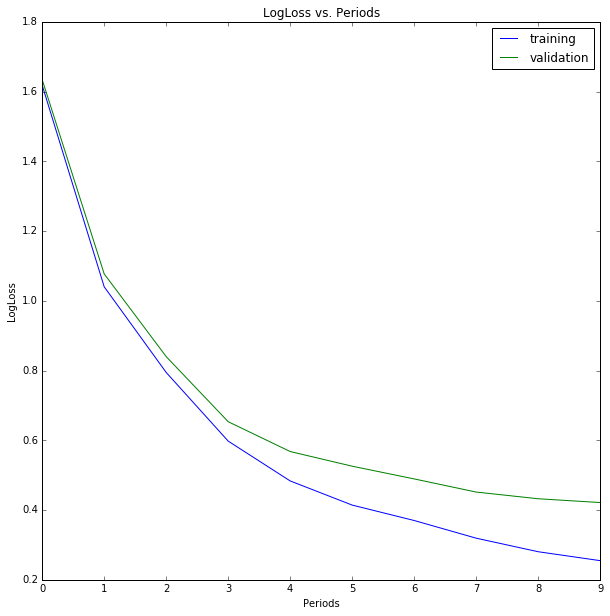

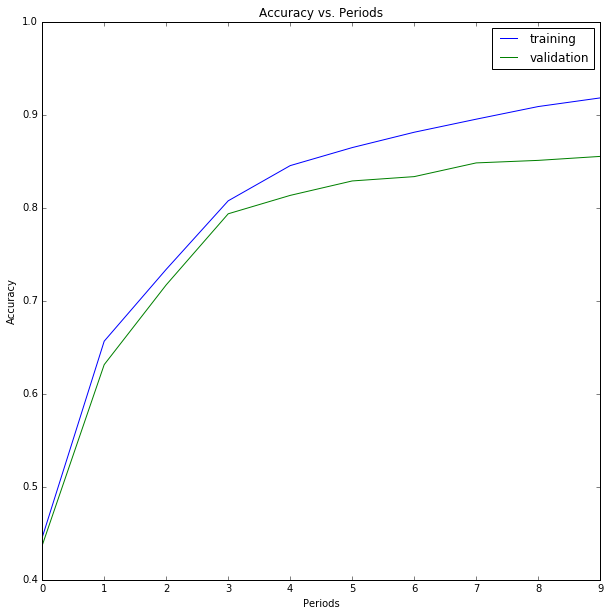

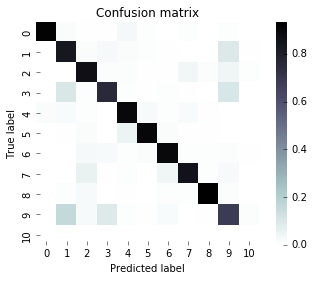

CPU times: user 1h 35min 57s, sys: 15min 24s, total: 1h 51min 21s
Wall time: 18min 15s


In [122]:
%%time
classifier = train_classification_model(
    learning_rate=.01,#0.001,#0.05,
    steps=10000,
#     learning_rate=.000000000001,
#     steps=1,
    batch_size=64,
    hidden_units=[5],
    model_directory="./speech_cnn_models/first_test6",#"./mobilenet_v6/sound_all_1000000_steps_jul_20_1",#Remember to change directory right after you run model
    periods = 10,#5,#2# was 10,
    training_examples=training_examples,
    training_targets=training_targets,
    validation_examples=validation_examples,
    validation_targets=validation_targets
)
#Good one cnn ./speech_cnn_models/first_test5 is the good one

In [ ]:
# creat_checkpoint(notebook_id) #could automatically create save

In [ ]:
# ###test
# pic = img_to_arr(os.path.join(DATADIR, 'picts/test/clip_eb9c403fc.jpg'))

# fig = plt.figure(figsize = (10,10))
# ax1 = fig.add_subplot(111)
# ax1.set_xticks([])
# ax1.set_yticks([])

# ax1.set_title('Spectogram - Three')
# ax1.imshow(pic)#, aspect='auto', origin='lower')
# print(pic.shape)

In [123]:
TEST_POSSIBLE_LABELS = 'yes no up down left right on off stop go silence'.split()

In [124]:
# ## Grab data here

# def load_test_data(data_dir):
#     """ Return 2 lists of tuples:
#     [(class_id, user_id, path), ...] for train
#     [(class_id, user_id, path), ...] for validation
#     """
#     # Just a simple regexp for paths with three groups:
#     # prefix, label, user_id
#     pattern = re.compile("(.+\/)?(\w+)\/([^_]+)_.+jpg")
#     all_files = sorted(glob(os.path.join(data_dir, 'picts/test/*jpg')))#changed
#     print(all_files[0])

# #     possible = set(TEST_POSSIBLE_LABELS)
#     test = []
#     for entry in all_files:
#         r = re.match(pattern, entry)
#         if r:
#             sample = (entry[-len('clip_cec9bf1c6.jpg'):-4], entry)
# #             print(sample)
# #             print(entry[-len('clip_cec9bf1c6.jpg'):-3])
#             test.append(sample)
            
#     print('There are {} test samples'.format(len(test)))
#     return test

# testset = load_test_data(DATADIR)

In [125]:
## Grab data here (# Only once)
DATADIR = '/home/harrisonfsmith95/machine_learning/speech/data' # unzipped train and test data
import os
import re
from glob import glob

def load_test_data(data_dir):
    """ Return 2 lists of tuples:
    [(class_id, user_id, path), ...] for train
    [(class_id, user_id, path), ...] for validation
    """
    # Just a simple regexp for paths with three groups:
    # prefix, label, user_id
    pattern = re.compile("(.+\/)?(\w+)\/([^_]+)_.+jpg")
    all_files = sorted(glob(os.path.join(data_dir, 'picts/test_96_imsave/*jpg')))#changed
    print(all_files[0])

#     possible = set(TEST_POSSIBLE_LABELS)
    test = []
    for entry in all_files:
        r = re.match(pattern, entry)
        if r:
            sample = (entry[-len('clip_cec9bf1c6.jpg'):-4], entry)
#             print(sample)
#             print(entry[-len('clip_cec9bf1c6.jpg'):-3])
            test.append(sample)
            
    print('There are {} test samples'.format(len(test)))
    return test

testset = load_test_data(DATADIR)

/home/harrisonfsmith95/machine_learning/speech/data/picts/test_96_imsave/clip_000044442.jpg
There are 158538 test samples


In [126]:
print(testset[0])

('clip_000044442', '/home/harrisonfsmith95/machine_learning/speech/data/picts/test_96_imsave/clip_000044442.jpg')


In [127]:
# ############wityh labels in testset
# # # Create CSV for tpu tf.records
# testTfRecords = pd.DataFrame(testset, columns=['label','name', 'URL-of-image'])
# testTfRecords.drop(['name'], axis=1, inplace=True)
# testTfRecords = testTfRecords[testTfRecords.columns[::-1]]
# print(testTfRecords)
# testTfRecords.to_csv('testTfRecords.csv', index=False)
# testTfRecords[3:5].to_csv('testValTfRecords.csv', index=False)



# ############ without labels in testset
# # testTfRecords = pd.DataFrame(testset, columns=['name', 'URL-of-image'])
# # testTfRecords.drop(['name'], axis=1, inplace=True)
# # testTfRecords = testTfRecords[testTfRecords.columns[::-1]]
# # testTfRecords['label'] = 0
# # testTfRecords['label'][0:10] = 1
# # print(testTfRecords['URL-of-image'][0])
# # testTfRecords.to_csv('testTfRecords.csv', index=False)
# # testTfRecords[-3:-1].to_csv('testValTfRecords.csv', index=False)

In [128]:
all_images = []
subfolder_lens = []
# for x in range(len(PREDICTION_LABELS)):
test_files = sorted([x for x in os.listdir(DATADIR + '/picts/test_96_imsave/') if '.jpg' in x])
print(test_files[0])
# number_of_files = len(subfolder_files)
# print("index: %d - folder name: %s - number of files: %d" % (x, PREDICTION_LABELS[x], number_of_files))
# number_of_files = 2350 #len(number_of_files)
# subfolder_lens.append(number_of_files)

clip_000044442.jpg


In [129]:
# for count, filename in enumerate(sorted(test_files), start=1):
#     if count < 10:
#         print('Enter {} to select {}'.format(count, filename))

In [130]:
##################check = pd.DataFrame(testset)

In [131]:
# print(testset[158537][0], testset[158537][1])

# check['sort'] = check[0].str.extract('(\d+)', expand=False).astype(float)
# check.sort_values('sort',inplace=True, ascending=False)
# check = check.drop('sort', axis=1)

# check = check.sort_values(by=[0], ascending=True)
# check = check.sort_values(0)

# ## print(check.head(2))
# ## print(check[check[0] == 'clip_000044442'])

In [132]:
########## SAVE TIME: operation done once and saved at './data/numpy_array_test_examples.npy'

# #loads np array of test examples converted to numpy array
# test_examples = np.load('./data/numpy_array_test_examples.npy')

# #loads np array of test examples converted to numpy array.foat32 not divided by 255
# float_test_examples = np.load('./data/numpy_array_test_examples_floats_not_divided.npy')

# #loads np array of test examples converted to numpy array.foat32 divided by 255
# divided_float_test_examples = np.load('./data/numpy_array_test_examples_floats_255_divided.npy')

######### Do only once
test_examples = []
for i in testset:#[0:300]:
    #append features i[1] = path to wav file
    new3 = img_to_arr(i[1])
    test_examples.append(new3)
    
test_examples = np.array(test_examples)

In [133]:
test_examples

array([[[[137, 207, 103],
         [174, 255,  76],
         [178, 252,  65],
         ...,
         [142, 207,  95],
         [133, 207, 103],
         [169, 209,  69]],

        [[136, 208, 102],
         [135, 255, 109],
         [145, 252,  99],
         ...,
         [152, 255,  94],
         [151, 255,  98],
         [187, 255,  61]],

        [[116, 207, 123],
         [117, 255, 132],
         [117, 252, 127],
         ...,
         [ 96, 252, 148],
         [106, 251, 142],
         [115, 251, 133]],

        ...,

        [[ 54, 241, 203],
         [ 32, 240, 213],
         [ 37, 255, 213],
         ...,
         [ 10, 234, 240],
         [  8, 229, 243],
         [  5, 213, 251]],

        [[ 10, 223, 244],
         [  9, 220, 247],
         [ 12, 213, 244],
         ...,
         [  5, 202, 250],
         [  9, 197, 248],
         [  7, 157, 247]],

        [[  7, 154, 245],
         [  8, 193, 247],
         [  2, 164, 249],
         ...,
         [  8, 164, 249],
        

In [134]:
test_examples.shape

(158538, 28, 28, 3)

In [ ]:
# # #save numpy array for quick storage
# np.save('./data/numpy_array_test_examples', test_examples)
# # # test_examples = np.load('./data/numpy_array_test_examples.npy')
# # print(divided_float_test_examples[10:20])
# # test_examples = divided_float_test_examples

In [135]:
########## SAVE TIME: operation done once and saved at './data/numpy_array_test_examples_255_floats.npy'

# loads np array of test examples converted to numpy array and converted to float32 then divided by 255
# test_examples = np.load('./data/numpy_array_test_examples_255_floats.npy')

######### Do only once
# for idx, t in enumerate(test_examples):
#     test_examples[idx] = t / 255  
# #Save numpy array for quick storage
# # np.save('./data/numpy_array_test_examples_floats_255_divided', test_examples)

########## Not enough memory
# test_examples = test_examples.astype('float32')
test_examples = (test_examples / 255).astype('float32')
# test_examples = test_examples.astype('float32')

# test_examples = float_test_examples / 255
print(test_examples[0:10])

[[[[0.5372549  0.8117647  0.40392157]
   [0.68235296 1.         0.29803923]
   [0.69803923 0.9882353  0.25490198]
   ...
   [0.5568628  0.8117647  0.37254903]
   [0.52156866 0.8117647  0.40392157]
   [0.6627451  0.81960785 0.27058825]]

  [[0.53333336 0.8156863  0.4       ]
   [0.5294118  1.         0.42745098]
   [0.5686275  0.9882353  0.3882353 ]
   ...
   [0.59607846 1.         0.36862746]
   [0.5921569  1.         0.38431373]
   [0.73333335 1.         0.23921569]]

  [[0.45490196 0.8117647  0.48235294]
   [0.45882353 1.         0.5176471 ]
   [0.45882353 0.9882353  0.49803922]
   ...
   [0.3764706  0.9882353  0.5803922 ]
   [0.41568628 0.9843137  0.5568628 ]
   [0.4509804  0.9843137  0.52156866]]

  ...

  [[0.21176471 0.94509804 0.79607844]
   [0.1254902  0.9411765  0.8352941 ]
   [0.14509805 1.         0.8352941 ]
   ...
   [0.03921569 0.91764706 0.9411765 ]
   [0.03137255 0.8980392  0.9529412 ]
   [0.01960784 0.8352941  0.9843137 ]]

  [[0.03921569 0.8745098  0.95686275]
   [0.0

In [ ]:
# np.save('./data/numpy_array_test_examples_255_floats', test_examples)

In [ ]:
# ## Maybe divide by 255
# # test_examples = test_examples / 255

# for idx, t in enumerate(test_examples):
#     test_examples[idx] = t / 255
# test_examples = test_examples.astype('float32')

In [136]:
print(test_examples[20])

[[[0.5058824  0.8        0.4627451 ]
  [0.54509807 1.         0.42745098]
  [0.49019608 0.9843137  0.4862745 ]
  ...
  [0.4745098  0.8156863  0.44705883]
  [0.43137255 0.80784315 0.5294118 ]
  [0.39607844 0.8117647  0.5372549 ]]

 [[0.6039216  0.8117647  0.34901962]
  [0.5921569  1.         0.38039216]
  [0.50980395 0.9882353  0.4627451 ]
  ...
  [0.5686275  1.         0.4117647 ]
  [0.5058824  1.         0.47843137]
  [0.43529412 1.         0.5254902 ]]

 [[0.4509804  0.80784315 0.47843137]
  [0.50980395 1.         0.4627451 ]
  [0.47843137 0.9882353  0.47843137]
  ...
  [0.5372549  0.9882353  0.40784314]
  [0.5529412  0.9882353  0.40392157]
  [0.44313726 0.98039216 0.5254902 ]]

 ...

 [[0.48235294 0.99215686 0.47843137]
  [0.5372549  0.99215686 0.43137255]
  [0.5686275  0.99607843 0.4       ]
  ...
  [0.4627451  1.         0.4745098 ]
  [0.4392157  0.9882353  0.5294118 ]
  [0.6666667  0.99215686 0.3137255 ]]

 [[0.5058824  0.99607843 0.4392157 ]
  [0.56078434 0.99607843 0.41568628]


In [137]:
predict_test_input_fn = tf.estimator.inputs.numpy_input_fn(
  x=test_examples,
  num_epochs=1,
  shuffle=False)

test_predictions = classifier.predict(input_fn=predict_test_input_fn)
test_predictions = np.array([item['classes'] for item in test_predictions])
  
# accuracy = metrics.accuracy_score(test_targets, test_predictions)
# print("Accuracy on test data: %0.2f" % accuracy)

In [138]:
print(test_predictions)

[ 1  3  9 ...  8 10  8]


In [139]:
new = pd.read_csv("data/sample_submission.csv", sep=",")
print(new[:10])
# print(testset[0])
new_i = 0
for label in test_predictions:#labeles are numbers
    #concat as 'unknown'
    if label >= len(TEST_POSSIBLE_LABELS):
        label = 'unknown'
    else:
        #concatinate a list
        label = TEST_POSSIBLE_LABELS[label]
#     label = POSSIBLE_LABELS[label]
    new['label'][new_i] = label
    new_i += 1
# print(new[10000:10010])

                fname    label
0  clip_000044442.wav  silence
1  clip_0000adecb.wav  silence
2  clip_0000d4322.wav  silence
3  clip_0000fb6fe.wav  silence
4  clip_0001d1559.wav  silence
5  clip_0002256ed.wav  silence
6  clip_0002a4a1f.wav  silence
7  clip_0002d9b83.wav  silence
8  clip_000373a5b.wav  silence
9  clip_0003c7122.wav  silence


In [140]:
print(new[10000:10010])

                    fname    label
10000  clip_1025e3a13.wav       go
10001  clip_1025f9065.wav       no
10002  clip_1026310c8.wav       on
10003  clip_102671f36.wav  silence
10004  clip_102672024.wav     down
10005  clip_102678d8d.wav     down
10006  clip_1026eec18.wav      off
10007  clip_1027222ed.wav     down
10008  clip_10275d5db.wav       no
10009  clip_1027e46cf.wav     stop


In [141]:
# play audio to check if correct
import IPython
link = str("./data/test/audio/" + new['fname'][10000])
# link = str("./data/train/audio/_background_noise_/" + 'doing_the_dishes.wav')
print(link)
IPython.display.Audio(link)

./data/test/audio/clip_1025e3a13.wav


In [142]:
# # fname,label
# print(len(test_predictions))
# new = pd.concat([mnist_test_sample_dataframe['fname'], new], axis=1)###Not this, but example of how to create
# print(new)

In [143]:
print(new[10000:10010])

                    fname    label
10000  clip_1025e3a13.wav       go
10001  clip_1025f9065.wav       no
10002  clip_1026310c8.wav       on
10003  clip_102671f36.wav  silence
10004  clip_102672024.wav     down
10005  clip_102678d8d.wav     down
10006  clip_1026eec18.wav      off
10007  clip_1027222ed.wav     down
10008  clip_10275d5db.wav       no
10009  clip_1027e46cf.wav     stop


In [144]:
new.to_csv('speech_predictions_cnn_pred1.csv', index=False)